# Helping find a better sleep
[_A DataCamp challenge_](https://datacamp.com)
![](img/good-sleep-quality.jpg)
Jan, 2025
> Data Analysis

## The project
A sleep-tracking app monitors sleep patterns and collects users' self-reported data on lifestyle habits. The idea is to identify lifestyle, health, and demographic factors that strongly correlate with poor sleep quality.

## The data
An anonymized dataset is provided of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

***Acknowledgments**: Laksika Tharmalingam, Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset* (this is a fictitious dataset)

## Data validation
### Read the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the data from file
sleep = pd.read_csv('data/sleep_health_data.csv')
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Check data quality
#### Missing values

In [2]:
# Daframe info
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


I will imput "No" text value to missing values in "Sleep Disorder" column.

In [3]:
# Assign value to missing values
sleep["Sleep Disorder"] = sleep["Sleep Disorder"].fillna("No")

#### Duplicated rows

In [4]:
# Check on all columns
print(f"Duplicated rows -> {sleep.duplicated().sum()}")

# Check on ID column
print(f"Duplicated 'Person ID' -> {sleep.duplicated(subset=["Person ID"]).sum()}")

# Check on the rest of the columns
print(f"Duplicated except on 'Person ID' -> {sleep.duplicated(subset=sleep.columns[1:]).sum()}")

Duplicated rows -> 0
Duplicated 'Person ID' -> 0
Duplicated except on 'Person ID' -> 242


I will consider that duplicated rows do not correspond to different people (it would be too unlikely with so many variables involved), so I will drop them alltogether assuming there was an error while recording the data.

I will also drop "Person ID" column because it has no value for the purpose of the analysis.

In [5]:
# Drop duplicates
sleep = sleep.drop_duplicates(subset=sleep.columns[1:])

# Drop "Person ID"
sleep = sleep.drop("Person ID", axis=1)
sleep

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
358,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,No
359,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,No
360,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
364,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Check value ranges
#### Categorical columns
Let’s see if variables of type ‘object’ (strings) contain categories.

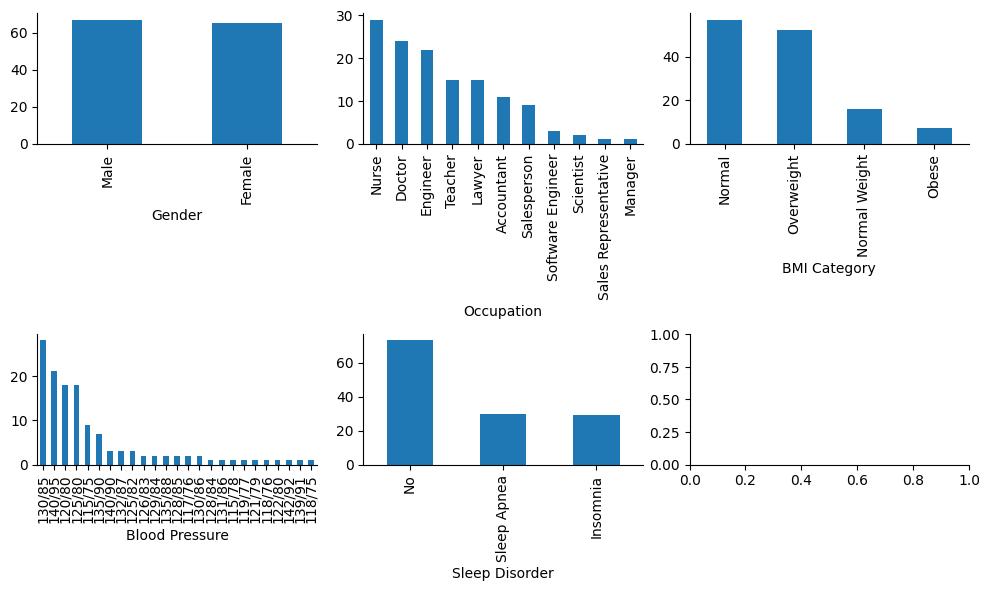

In [6]:
# Define funtion to plot value range
def plot_value_ranges(df, include, plot_cols=3, figsize=(10, 6)):
    # Select column names of "object" type
    cols = df.select_dtypes(include=include).columns
    
    # Plot grid of plots to check categorical values
    plot_cols = plot_cols
    plot_rows = len(cols) // plot_cols
    if len(cols) % plot_cols:
        plot_rows += 1
    
    fig, ax = plt.subplots(plot_rows, plot_cols, figsize=figsize)
    plot_row = 0
    plot_col = 0
    for col in cols:
        if include == "object":
            df[col].value_counts().plot(ax=ax[plot_row, plot_col], kind="bar")
        else:
            df[col].plot(ax=ax[plot_row, plot_col], kind="hist", legend=True)
        if plot_col < (plot_cols - 1):
            plot_col += 1
        else:
            plot_col = 0
            plot_row += 1
    
    sns.despine()
    fig.tight_layout()
    plt.show()

# Plot
plot_value_ranges(sleep, "object")

I will proceed with the following adjustements:
- In "BMI Category", "Normal" values can be added up to "Normal Weight".
- In "Occupation" column, "Sales Representative" category could be added up to "Salesperson".
- In "Blood Pressure" column, "Systolic/Diastolic" pairs can be categorized to blood pressure levels.

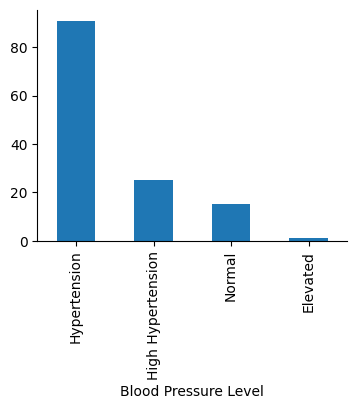

In [7]:
# Replace elements
sleep = sleep.replace({"Sales Representative": "Salesperson", "Normal Weight": "Normal"})

# Split the "Blood Pressures" column into two separate columns (systolic and diastolic)
sleep[["Systolic", "Diastolic"]] = sleep["Blood Pressure"].str.split('/', expand=True)

# Convert the new columns to integers (they are strings after splitting)
sleep["Systolic"] = sleep["Systolic"].astype(int)
sleep["Diastolic"] = sleep["Diastolic"].astype(int)

# Define funtion to classify blood pressure level
def classify_blood_pressure(systolic, diastolic):
    if systolic < 90 or diastolic < 60:
        return "Low"
    elif systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic < 130 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return "Hypertension"
    elif systolic >= 140 or diastolic >= 90:
        return "High Hypertension"
    elif systolic > 180 or diastolic > 120:
        return "Hypertensive Crisis"
    else:
        return "Unclassified"

# Apply the classify_blood_pressure function to create the "Blood Pressure Level" column
sleep["Blood Pressure Level"] = sleep.apply(lambda row: classify_blood_pressure(row["Systolic"], row["Diastolic"]), axis=1)

# Drop columns not being used further
sleep = sleep.drop(["Blood Pressure", "Systolic", "Diastolic"], axis=1)

# # Covert columns of "object" type to category datatype
# sleep = sleep.astype({column : "category" for column in sleep.select_dtypes(include="object").columns})

# Covert columns to ordered category datatype
labels = ["Normal", "Elevated", "Hypertension", "High Hypertension"]
sleep["Blood Pressure Level"] = sleep["Blood Pressure Level"].astype(pd.CategoricalDtype(categories=labels, ordered=True))

labels = ["Normal", "Overweight", "Obese"]
sleep["BMI Category"] = sleep["BMI Category"].astype(pd.CategoricalDtype(categories=labels, ordered=True))

labels = ["No", "Sleep Apnea", "Insomnia"]
sleep["Sleep Disorder"] = sleep["Sleep Disorder"].astype(pd.CategoricalDtype(categories=labels, ordered=True))

# Convert the rest to unordered category
sleep = sleep.astype({column : "category" for column in ["Gender", "Occupation"]})

# Plot "Blood Pressure Level" to check the categories it contains
fig, ax = plt.subplots(figsize=(4, 3))
sleep["Blood Pressure Level"].value_counts().plot(ax=ax, kind="bar")
sns.despine()
plt.show()

#### Numerical columns

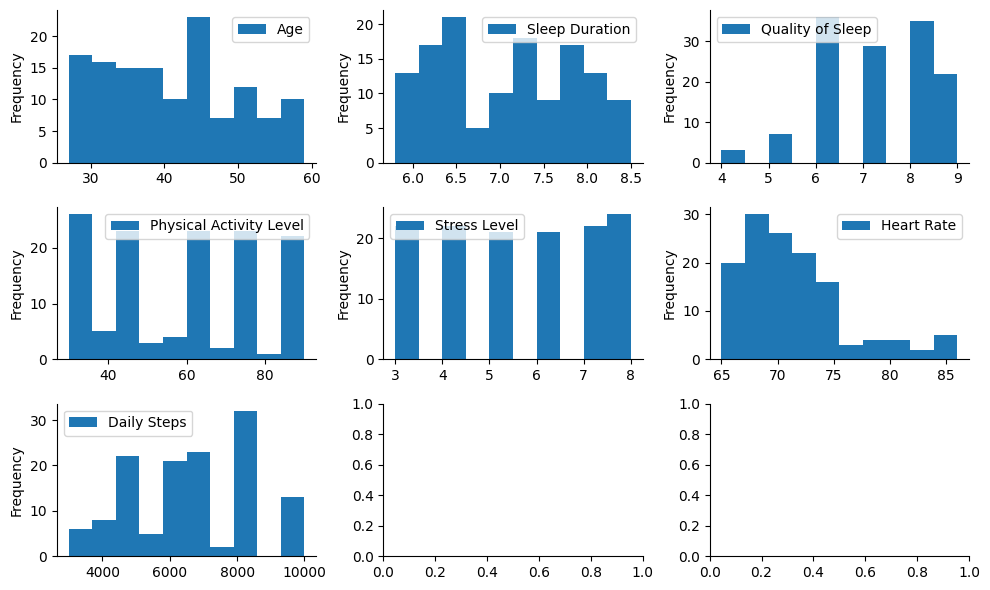

In [8]:
# Plot
plot_value_ranges(sleep, ["int64", "float64"])

I will establish categorical age intervals for the purpose of the analysis. Considering available ages, I choose:
- [27, 38) as "Young Adult"
- [38, 49) as "Middle-aged"
- [49, 60) as "Older Adult"

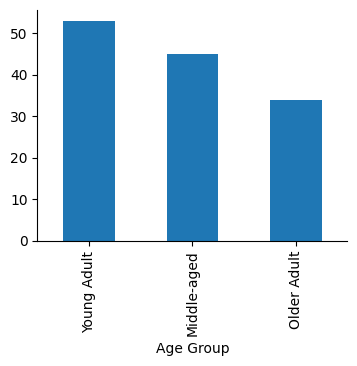

In [9]:
# Define the bin intervals
bins = [27, 38, 49, 60]

# Define the labels for each bin
labels = ["Young Adult", "Middle-aged", "Older Adult"]

# Bin the ages and assign labels
sleep["Age Group"] = pd.cut(sleep["Age"], bins=bins, labels=labels, right=False)

# Make it an ordered category column
sleep["Age Group"] = sleep["Age Group"].astype(pd.CategoricalDtype(categories=labels, ordered=True))

# Plot
fig, ax = plt.subplots(figsize=(4, 3))
sleep["Age Group"].value_counts().plot(ax=ax, kind="bar")
sns.despine()
plt.show()

I will also categorize Physical Activity Level (minutes/day) as:
- Low Activity: less than 30 minutes
- Medium Activity: between 30 and 60 minutes
- High Activity: more than 60 minutes

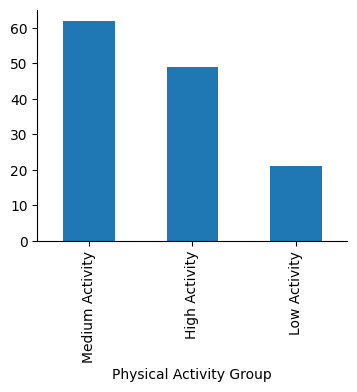

In [10]:
# Define the bin intervals
bins = [0, 31, 61, 1000]

# Define the labels for each bin
labels = ["Low Activity", "Medium Activity", "High Activity"]

# Bin the ages and assign labels
sleep["Physical Activity Group"] = pd.cut(sleep["Physical Activity Level"], bins=bins, labels=labels, right=False)

# Make it an ordered category column
sleep["Physical Activity Group"] = sleep["Physical Activity Group"].astype(pd.CategoricalDtype(categories=labels, ordered=True))

# Plot
fig, ax = plt.subplots(figsize=(4, 3))
sleep["Physical Activity Group"].value_counts().plot(ax=ax, kind="bar")
sns.despine()
plt.show()

## Data analysis
The dataframe that will be object of the analysis looks this way:

In [11]:
# Show dataframe
sleep

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Level,Age Group,Physical Activity Group
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No,Hypertension,Young Adult,Medium Activity
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No,Hypertension,Young Adult,Medium Activity
3,Male,28,Salesperson,5.9,4,30,8,Obese,85,3000,Sleep Apnea,High Hypertension,Young Adult,Low Activity
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,High Hypertension,Young Adult,Low Activity
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,High Hypertension,Young Adult,Medium Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,No,High Hypertension,Older Adult,High Activity
359,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,No,High Hypertension,Older Adult,High Activity
360,Female,59,Nurse,8.2,9,75,3,Overweight,68,7000,Sleep Apnea,High Hypertension,Older Adult,High Activity
364,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,High Hypertension,Older Adult,High Activity


### Correlations
Correlation coefficients between numerical columns:

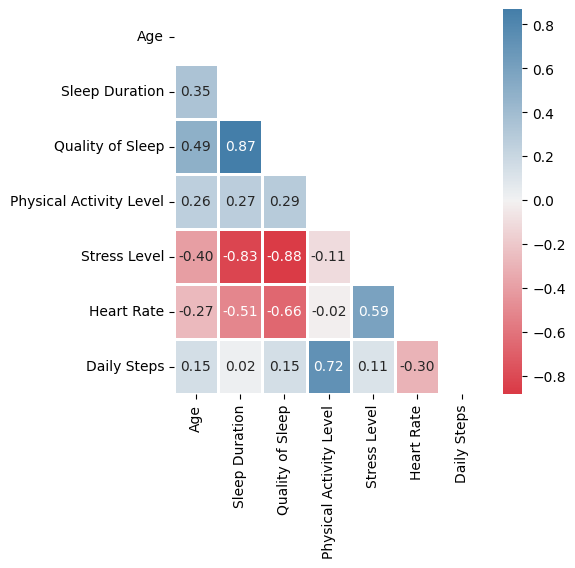

In [12]:
# Get pearson correlation matrix
corr = sleep.select_dtypes(include="number").corr()

# Create a mask to only show half of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a diverging color palette between two HUSL colors.
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(corr, ax=ax, mask=mask,
            center=0, cmap=cmap, linewidths=1,
            annot=True, fmt=".2f"
           )

plt.show()

Here are the _strong_ correlations:
- **Quality of sleep** (subjective) is very much correlated with **Sleep Duration** (more objective), so any of them will serve as a reference to evaluate the sleep.
- **Stress Level** is very much negatively correlated with **Quality of Sleep** (and so with **Sleep Duration**).

Some _milder_ correlations:
- **Daily Steps** is quite correlated with **Physical Activity Level**, but no so much (they are not the same).
- Higher **Heart Rate** tends to affect negatively **Quality of Sleep**.
- **Stress Level** is related in some extend to **Heart Rate**.

### Q: Who sleep better, women or men?

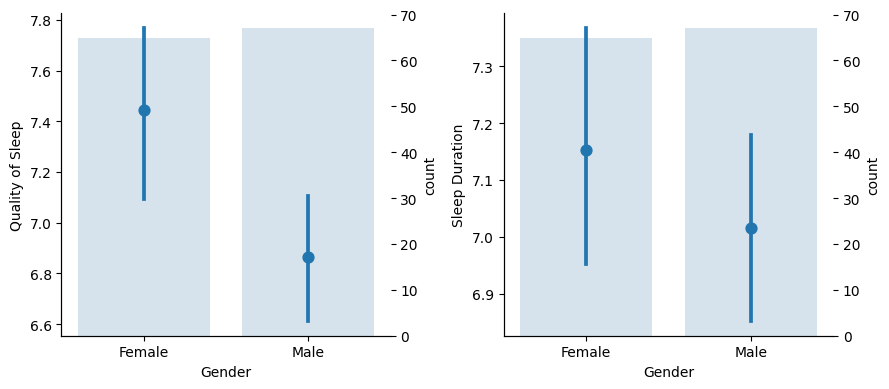

In [13]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.pointplot(x="Gender", y="Quality of Sleep", data=sleep, ax=ax[0], linestyles="none")
sns.pointplot(x="Gender", y="Sleep Duration", data=sleep, ax=ax[1], linestyles="none")
sns.countplot(x="Gender", data=sleep, ax=ax[0].twinx(), alpha=0.2)
sns.countplot(x="Gender", data=sleep, ax=ax[1].twinx(), alpha=0.2)
sns.despine()
fig.tight_layout()
plt.show()

On the left graph we can see that female individuals have a better subjective sleep quality experience than male, with not overlapping confidence intervals signaling that it could be a robust pattern.

On the right one though, the overlapping in the number of hours indicates that sleep durations in the populations maybe are not so different, we could no say confidently that women sleep more hours than men.

### Q: How does age relate to sleep quality?

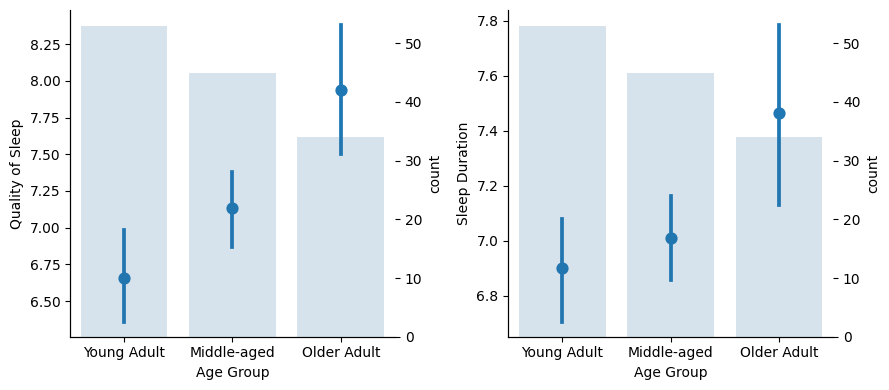

In [14]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.pointplot(x="Age Group", y="Quality of Sleep", data=sleep, ax=ax[0], linestyles="none")
sns.pointplot(x="Age Group", y="Sleep Duration", data=sleep, ax=ax[1], linestyles="none")
sns.countplot(x="Age Group", data=sleep, ax=ax[0].twinx(), alpha=0.2)
sns.countplot(x="Age Group", data=sleep, ax=ax[1].twinx(), alpha=0.2)
sns.despine()
fig.tight_layout()
plt.show()

As we age, the sleep experience seems to improve, especially for Older Adults as there is no overlapping in the confidence interval. But...

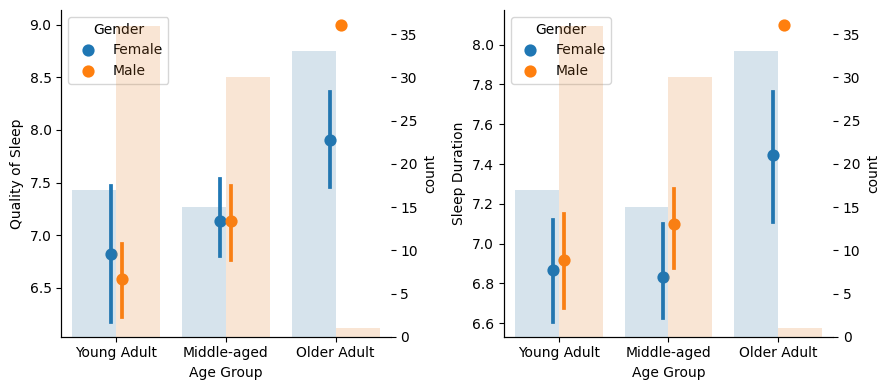

In [15]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.pointplot(x="Age Group", y="Quality of Sleep", data=sleep, ax=ax[0], linestyles="none", hue="Gender", dodge=0.1)
sns.pointplot(x="Age Group", y="Sleep Duration", data=sleep, ax=ax[1], linestyles="none", hue="Gender", dodge=0.1)
sns.countplot(x="Age Group", data=sleep, ax=ax[0].twinx(), alpha=0.2, hue="Gender", legend=False)
sns.countplot(x="Age Group", data=sleep, ax=ax[1].twinx(), alpha=0.2, hue="Gender", legend=False)
sns.despine()
fig.tight_layout()
plt.show()

...there is only one male in the Older Adult group! This surely affects the Older Adult group outcome, as this group is mainly formed by females and, as we saw, females have a better sleep experience.

So we cannot say that Older Adults in general (both man and women) sleep better. We should have more male samples to asses that.

### Q: Does physical activity improve sleep?

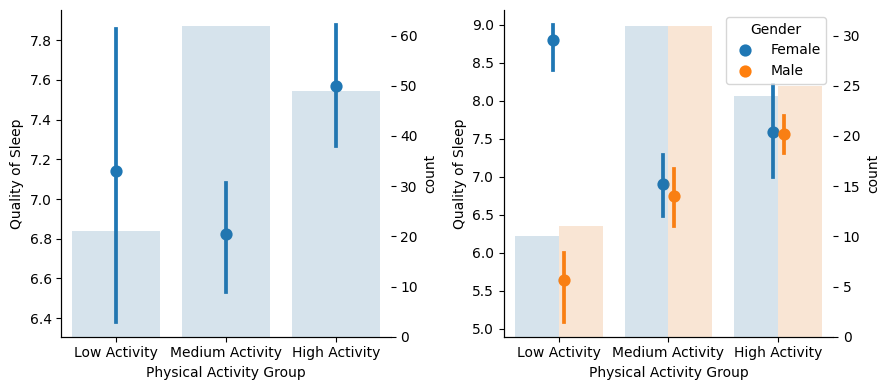

In [16]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.pointplot(x="Physical Activity Group", y="Quality of Sleep", data=sleep, ax=ax[0], linestyles="none")
sns.pointplot(x="Physical Activity Group", y="Quality of Sleep", data=sleep, ax=ax[1], linestyles="none", hue="Gender", dodge=0.1)
sns.countplot(x="Physical Activity Group", data=sleep, ax=ax[0].twinx(), alpha=0.2)
sns.countplot(x="Physical Activity Group", data=sleep, ax=ax[1].twinx(), alpha=0.2, hue="Gender", legend=False)
sns.despine()
fig.tight_layout()
plt.show()

It looks like High Activity improves sleep quality, at least related to Medium Activity (with Low Activity group members showing a lot of variance mainly caused by the discrepancy of results for men and women: women with low activity sleep much better than men with low activity; however, the number of samples are quite limited here with respect to the other groups, so it's risky to extrapolate).

### Q: How do different health conditions affect sleep quality?

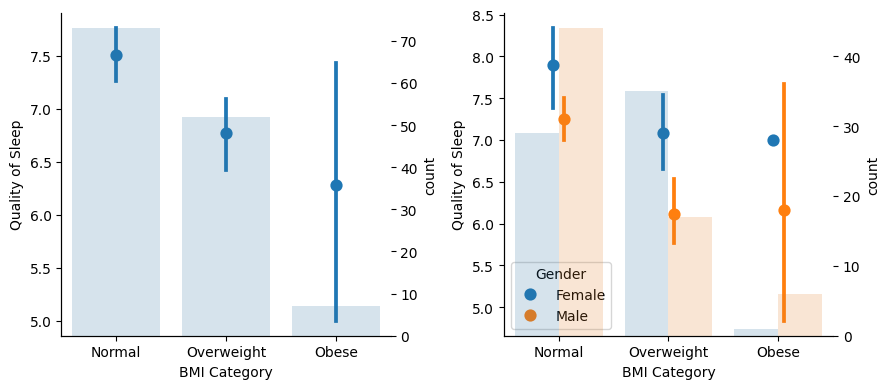

In [17]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.pointplot(x="BMI Category", y="Quality of Sleep", data=sleep, ax=ax[0], linestyles="none")
sns.pointplot(x="BMI Category", y="Quality of Sleep", data=sleep, ax=ax[1], linestyles="none", hue="Gender", dodge=0.1)
sns.countplot(x="BMI Category", data=sleep, ax=ax[0].twinx(), alpha=0.2)
sns.countplot(x="BMI Category", data=sleep, ax=ax[1].twinx(), alpha=0.2, hue="Gender", legend=False)
sns.despine()
fig.tight_layout()
plt.show()

There is a lot of uncertainty related to Obese people because of scarcity of samples and gender imbalance. For the other groups, there is a tendency for better sleep quality for Normal compared to Overweight people, also when comparing men and women separately.

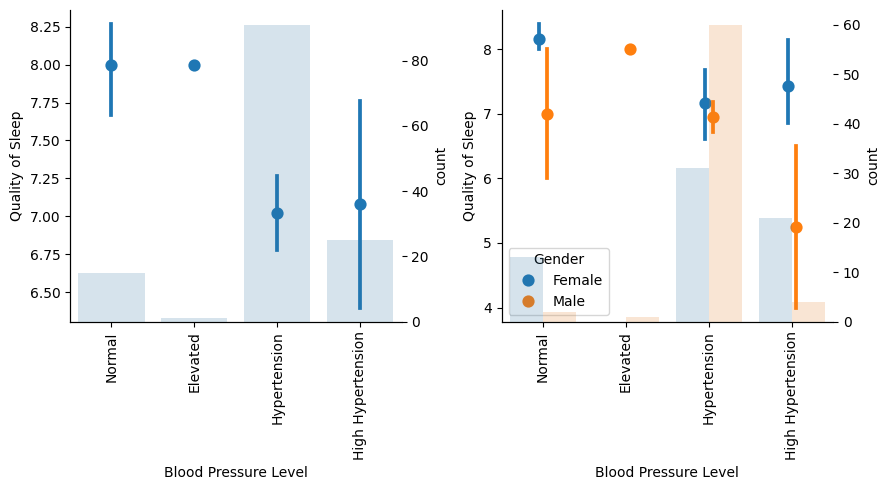

In [18]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.pointplot(x="Blood Pressure Level", y="Quality of Sleep", data=sleep, ax=ax[0], linestyles="none")
sns.pointplot(x="Blood Pressure Level", y="Quality of Sleep", data=sleep, ax=ax[1], linestyles="none", hue="Gender", dodge=0.1)
sns.countplot(x="Blood Pressure Level", data=sleep, ax=ax[0].twinx(), alpha=0.2)
sns.countplot(x="Blood Pressure Level", data=sleep, ax=ax[1].twinx(), alpha=0.2, hue="Gender", legend=False)
sns.despine()
ax[0].tick_params(axis="x", labelsize=10, rotation=90)
ax[1].tick_params(axis="x", labelsize=10, rotation=90)
fig.tight_layout()
plt.show()

There are not many samples in Elevated Blood Pressure level, neither for Normal and High Hypertension groups for males, so there are not clear outcomes here. Anyway, Normal tends to have better sleep quality than Hypertension.

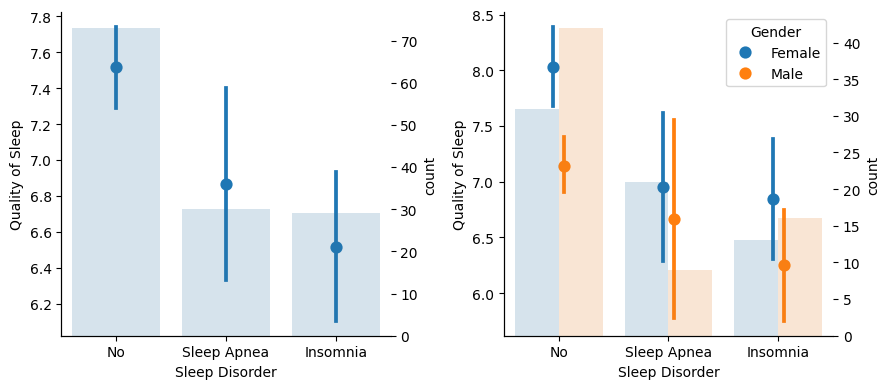

In [19]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.pointplot(x="Sleep Disorder", y="Quality of Sleep", data=sleep, ax=ax[0], linestyles="none")
sns.pointplot(x="Sleep Disorder", y="Quality of Sleep", data=sleep, ax=ax[1], linestyles="none", hue="Gender", dodge=0.1)
sns.countplot(x="Sleep Disorder", data=sleep, ax=ax[0].twinx(), alpha=0.2)
sns.countplot(x="Sleep Disorder", data=sleep, ax=ax[1].twinx(), alpha=0.2, hue="Gender", legend=False)
sns.despine()
fig.tight_layout()
plt.show()

From this charts we conclude that Insomnia prevents clearly a good night's sleep. When it comes to Apnea, female individuals don't seems to suffer from it as much as males when it comes to sleep quality.

### Q: How do occupations relate to sleep quality?

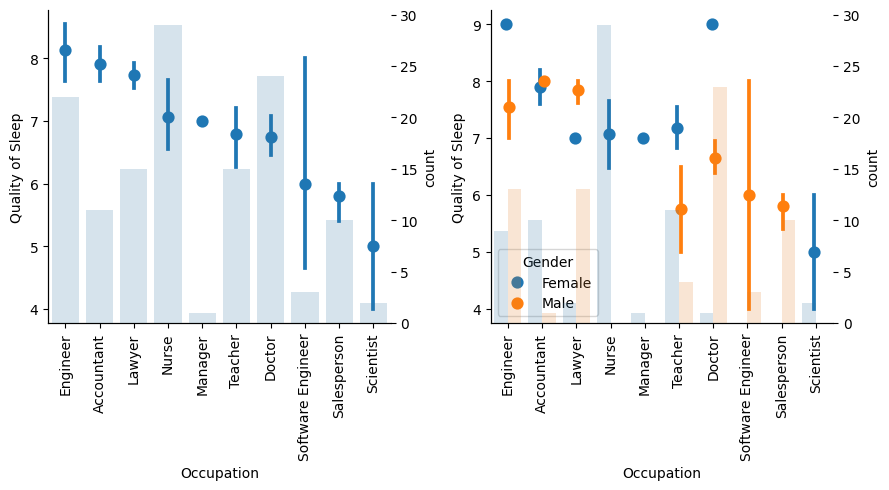

In [20]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
order = sleep.groupby("Occupation", observed=True)["Quality of Sleep"].mean().sort_values(ascending=False).index
sns.pointplot(x="Occupation", y="Quality of Sleep", data=sleep, ax=ax[0], linestyles="none", order=order)
sns.pointplot(x="Occupation", y="Quality of Sleep", data=sleep, ax=ax[1], linestyles="none", hue="Gender", dodge=0.1, order=order)
sns.countplot(x="Occupation", data=sleep, ax=ax[0].twinx(), alpha=0.2)
sns.countplot(x="Occupation", data=sleep, ax=ax[1].twinx(), alpha=0.2, hue="Gender", legend=False)
sns.despine()
ax[0].tick_params(axis="x", labelsize=10, rotation=90)
ax[1].tick_params(axis="x", labelsize=10, rotation=90)
fig.tight_layout()
plt.show()

With as much as 10 categories on Occupation, some are underepresented, especially when it comes to gender, so conclusions are harder to extract. For example, nurses have a relatively high sleep quality, but there are no male nurses, and as we know females sleep better, this outcome could be related to gender more than to the occupation.

## Conclusions
- The **quality** of the sleep is very much associated with the **duration** of it.
- The level of **stress** is a great predictor of sleep quality no matter what other circumstances.
- **Women** have a better subjective sleep quality experience than **men**, even though it is not clear than women sleep more hours than men.
- **Physical Activity** of more than 1 hour daily seems to improve sleep quality.
- Low **Physical Activity** (30 min) improves the sleep of women much more than of men.
- **Overweight** people tend to sleep worse than not overweight people.
- **Insomnia** clearly prevents from a good night's sleep.
- **Apnea** prevents sleep quality more for men than for females.
- When it comes to **Occupation**, number of samples and classes are quite inbalanced, so results here depend very much on the quantity of records.